In [1]:
print("Selam ISTKA YZ Son Ders :DDD ")

Selam ISTKA YZ Son Ders :DDD 


In [2]:
import sys
print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/My Drive/YAPAYZEKA')
!pwd

/content/drive/My Drive/YAPAYZEKA


In [8]:
import os
import pandas as pd

VeriSetiYolu = '/content/drive/My Drive/veriseti'

csv_dosyalari = [dosya for dosya in os.listdir(VeriSetiYolu) if dosya.endswith('.csv')]

csv_dosya_sayisi = len(csv_dosyalari)
print("VeriSetiYolu dosyası içerisinde", csv_dosya_sayisi, "tane *.csv uzantılı dosyası bulunmaktadır.")

print("Bulunan CSV Dosyaları:")
for dosya in csv_dosyalari:
    print(dosya)

VeriSetiYolu dosyası içerisinde 1 tane *.csv uzantılı dosyası bulunmaktadır.
Bulunan CSV Dosyaları:
ilcesuveriseti.csv


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

dosya_yolu = '/content/drive/My Drive/veriseti/ilcesuveriseti.csv'
csv_dosya = pd.read_csv(dosya_yolu)

print(csv_dosya)

   ID;ILCELER;2015;2016;2017;2018;2019;2020;2021;2022
0   1;ADALAR;1.432.494;1.472.276;1.366.581;1.399.1...
1   2;ARNAVUTKOY;8.002.123;9.178.953;10.176.132;11...
2   3;ATASEHIR;18.597.049;19.974.097;21.205.911;21...
3   4;AVCILAR;16.220.476;17.052.253;17.558.403;18....
4   5;BUYUKCEKMECE;9.915.435;10.788.924;11.172.787...
5   6;BAHCELIEVLER;23.610.609;24.320.533;24.868.59...
6   7;BAKIRKOY;11.510.117;11.793.169;12.509.301;15...
7   8;BAYRAMPASA;11.545.682;11.914.393;12.516.185;...
8   9;BAGCILAR;26.691.720;28.182.511;29.362.186;31...
9   10;BASAKSEHIR;16.174.934;18.100.255;19.576.095...
10  11;BEYKOZ;10.254.740;10.891.434;11.331.655;12....
11  12;BEYLIKDUZU;12.346.365;13.630.387;14.948.006...
12  13;BEYOGLU;11.167.382;11.311.755;11.420.559;12...
13  14;BESIKTAS;11.976.186;12.385.216;12.609.953;1...
14  15;ESENLER;15.854.265;16.584.976;17.162.651;17...
15  16;ESENYURT;27.933.397;32.799.007;36.083.030;3...
16  17;EYUPSULTAN;17.116.911;17.901.848;18.222.331...
17  18;FATIH;22.358.121;21.7

In [11]:
# Veri setinin yolunun gösterimi ve yüklemesi
VeriSetiYolu = '/content/drive/My Drive/veriseti/ilcesuveriseti.csv'
data = pd.read_csv(VeriSetiYolu, delimiter=';')

# ; verilerini temizleyip , verisini dönüştürme işlemidir.
for i in data.columns[2:]:
    data[i] = data[i].str.replace('.', '').astype(int)

print(data.head())

   ID       ILCELER      2015      2016      2017      2018      2019  \
0   1        ADALAR   1432494   1472276   1366581   1399182   1371291   
1   2    ARNAVUTKOY   8002123   9178953  10176132  11404878  13818204   
2   3      ATASEHIR  18597049  19974097  21205911  21496185  22428468   
3   4       AVCILAR  16220476  17052253  17558403  18312736  19485453   
4   5  BUYUKCEKMECE   9915435  10788924  11172787  12222470  13606571   

       2020      2021      2022  
0   1513070   1435991   1543403  
1  15570466  17102127  18891299  
2  23737630  24281319  24377611  
3  20824893  20690506  21556002  
4  16015731  16167480  17412198  


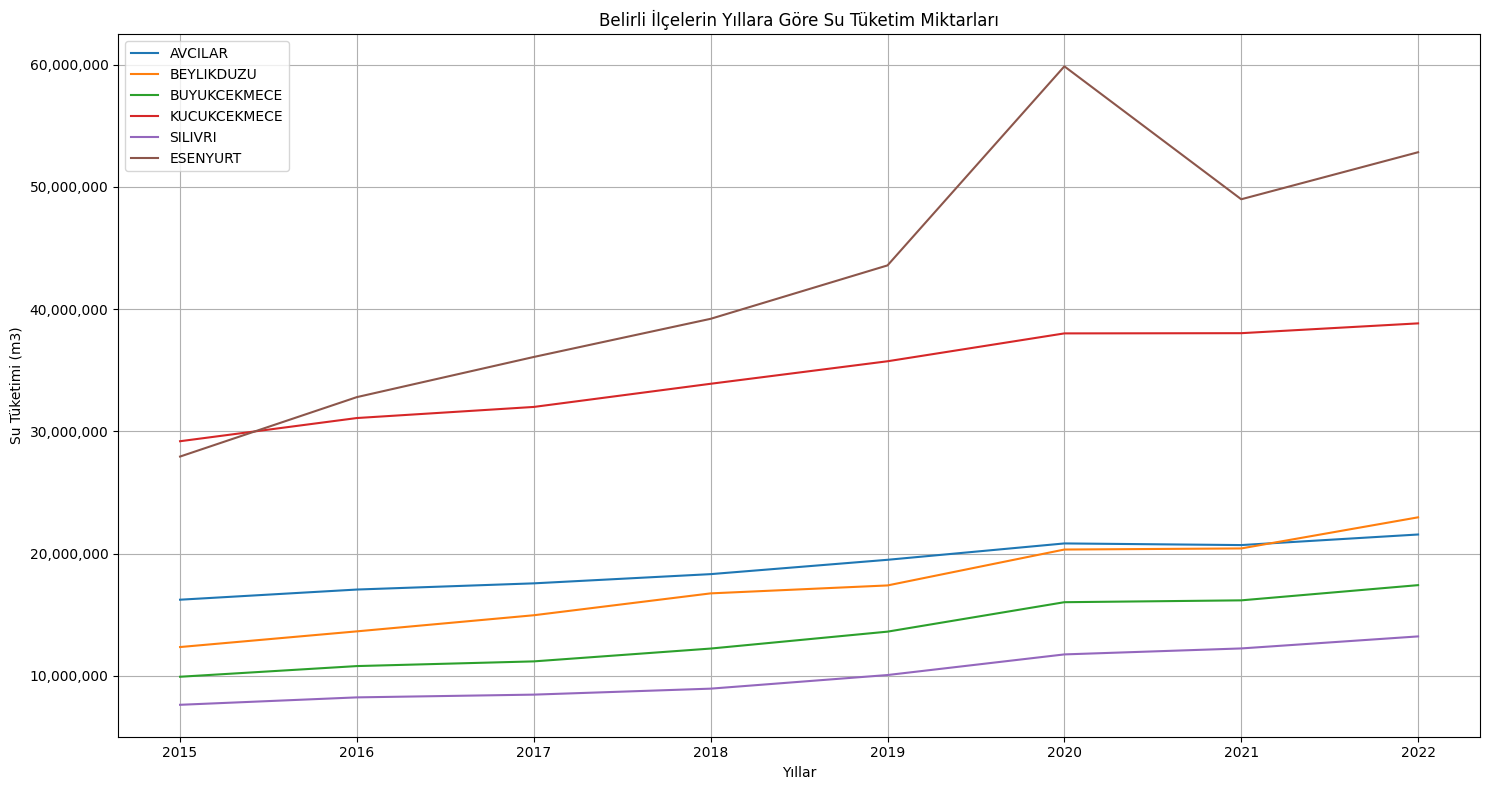

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

data = pd.read_csv(VeriSetiYolu, delimiter=';')

for i in data.columns[2:]:
    data[i] = data[i].str.replace('.', '').astype(int)

ilceler = ["AVCILAR", "BEYLIKDUZU", "BUYUKCEKMECE", "KUCUKCEKMECE", "SILIVRI", "ESENYURT"]
filtre = data[data['ILCELER'].isin(ilceler)]

plt.figure(figsize=(15, 8))

for ilce in ilceler:
    ilce_data = filtre[filtre['ILCELER'] == ilce]
    plt.plot(data.columns[2:], ilce_data.iloc[0, 2:], label=ilce)

plt.xlabel('Yıllar')
plt.ylabel('Su Tüketimi (m3)')
plt.title('Belirli İlçelerin Yıllara Göre Su Tüketim Miktarları')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
!pip install plotly

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

data = pd.read_csv(VeriSetiYolu, delimiter=';')

for i in data.columns[2:]:
    data[i] = data[i].str.replace('.', '').astype(int)

ilce_bilgileri = ["AVCILAR", "BEYLIKDUZU", "BUYUKCEKMECE", "KUCUKCEKMECE", "SILIVRI", "ESENYURT"]
filtre = data[data['ILCELER'].isin(ilce_bilgileri)]

fig = go.Figure()

for ilce in ilce_bilgileri:
    ilce_data = filtre[filtre['ILCELER'] == ilce]
    fig.add_trace(go.Scatter(
         x=data.columns[2:],
         y=ilce_data.iloc[0, 2:],
         mode='lines+markers',
         line=dict(width=3),
         name=ilce
        ))

fig.update_layout(
        title='AVCILAR, BEYLIKDUZU, BUYUKCEKMECE, KUCUKCEKMECE, SILIVRI, ESENYURT İlçelerin Yıllara Göre Su Tüketim Miktarları',
        xaxis_title='Yıllar',
        yaxis_title='Su Tüketimi (m3)',
        yaxis=dict(tickformat=','),
        template='plotly_white'
)

fig.show()

In [15]:
!pip install tensorflow

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = pd.read_csv(VeriSetiYolu, delimiter=';')

for col in data.columns[2:]:
    data[col] = data[col].str.replace('.', '').astype(int)

selected_ilces = ["AVCILAR", "BEYLIKDUZU", "BUYUKCEKMECE", "KUCUKCEKMECE", "SILIVRI", "ESENYURT"]
filtered_data = data[data['ILCELER'].isin(selected_ilces)]

ilce = 'AVCILAR'
ilce_data = filtered_data[filtered_data['ILCELER'] == ilce].iloc[0, 2:].values.reshape(-1, 1)

years = data.columns[2:].astype(int)

scaler = MinMaxScaler(feature_range=(0, 1))
ilce_data_scaled = scaler.fit_transform(ilce_data)

def create_dataset(dataset, tahmin_adimi=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - tahmin_adimi):
        a = dataset[i:(i + tahmin_adimi), 0]
        dataX.append(a)
        dataY.append(dataset[i + tahmin_adimi, 0])
    return np.array(dataX), np.array(dataY)

tahmin_adimi = 4
trainX, trainY = create_dataset(ilce_data_scaled, tahmin_adimi)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(tahmin_adimi, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
3/3 - 4s - 1s/step - loss: 0.5888 - val_loss: 0.9040
Epoch 2/100
3/3 - 0s - 20ms/step - loss: 0.5335 - val_loss: 0.8058
Epoch 3/100
3/3 - 0s - 19ms/step - loss: 0.4806 - val_loss: 0.7007
Epoch 4/100
3/3 - 0s - 20ms/step - loss: 0.4192 - val_loss: 0.5863
Epoch 5/100
3/3 - 0s - 21ms/step - loss: 0.3484 - val_loss: 0.4610
Epoch 6/100
3/3 - 0s - 46ms/step - loss: 0.2770 - val_loss: 0.3231
Epoch 7/100
3/3 - 0s - 20ms/step - loss: 0.1865 - val_loss: 0.1852
Epoch 8/100
3/3 - 0s - 19ms/step - loss: 0.1087 - val_loss: 0.0627
Epoch 9/100
3/3 - 0s - 20ms/step - loss: 0.0375 - val_loss: 6.7995e-04
Epoch 10/100
3/3 - 0s - 18ms/step - loss: 0.0016 - val_loss: 0.0459
Epoch 11/100
3/3 - 0s - 19ms/step - loss: 0.0315 - val_loss: 0.1382
Epoch 12/100
3/3 - 0s - 23ms/step - loss: 0.0440 - val_loss: 0.0975
Epoch 13/100
3/3 - 0s - 19ms/step - loss: 0.0269 - val_loss: 0.0400
Epoch 14/100
3/3 - 0s - 20ms/step - loss: 0.0113 - val_loss: 0.0070
Epoch 15/100
3/3 - 0s - 17ms/step - loss: 0.0048 - val_

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


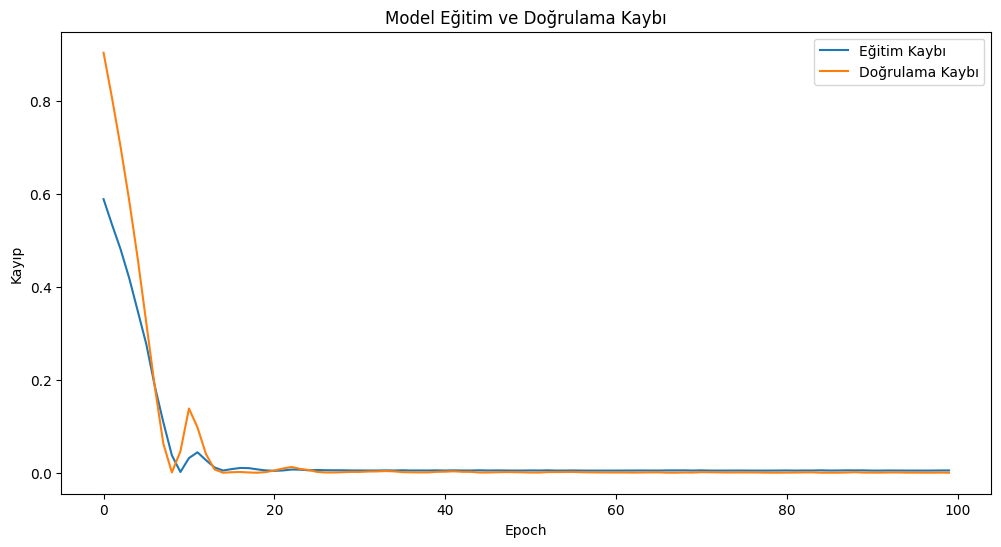

In [17]:
trainPredict = model.predict(trainX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
test_data = ilce_data_scaled[-tahmin_adimi:]
test_data = np.reshape(test_data, (1, tahmin_adimi, 1))
test_predict = model.predict(test_data)
test_predict = scaler.inverse_transform(test_predict)
test_y = ilce_data[-1:]
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

In [18]:
Modelin_kayip_degeri = [loss * 100 for loss in history.history['loss']]
for epoch, loss in enumerate(Modelin_kayip_degeri, 1):
    print(f"Eğitim Adımı {epoch}: Kayıp Oranı = {loss:.2f}%")
Kayip_hesabi = np.mean(Modelin_kayip_degeri)
print("Eğitim Modelinin Toplam Kayıp Oranı (Yüzdelik): ", Kayip_hesabi)
print("Eğitim Modelinin Başarı Oranı (Yüzdelik): ", 100-Kayip_hesabi)

Eğitim Adımı 1: Kayıp Oranı = 58.88%
Eğitim Adımı 2: Kayıp Oranı = 53.35%
Eğitim Adımı 3: Kayıp Oranı = 48.06%
Eğitim Adımı 4: Kayıp Oranı = 41.92%
Eğitim Adımı 5: Kayıp Oranı = 34.84%
Eğitim Adımı 6: Kayıp Oranı = 27.70%
Eğitim Adımı 7: Kayıp Oranı = 18.65%
Eğitim Adımı 8: Kayıp Oranı = 10.87%
Eğitim Adımı 9: Kayıp Oranı = 3.75%
Eğitim Adımı 10: Kayıp Oranı = 0.16%
Eğitim Adımı 11: Kayıp Oranı = 3.15%
Eğitim Adımı 12: Kayıp Oranı = 4.40%
Eğitim Adımı 13: Kayıp Oranı = 2.69%
Eğitim Adımı 14: Kayıp Oranı = 1.13%
Eğitim Adımı 15: Kayıp Oranı = 0.48%
Eğitim Adımı 16: Kayıp Oranı = 0.78%
Eğitim Adımı 17: Kayıp Oranı = 1.02%
Eğitim Adımı 18: Kayıp Oranı = 0.99%
Eğitim Adımı 19: Kayıp Oranı = 0.72%
Eğitim Adımı 20: Kayıp Oranı = 0.50%
Eğitim Adımı 21: Kayıp Oranı = 0.40%
Eğitim Adımı 22: Kayıp Oranı = 0.49%
Eğitim Adımı 23: Kayıp Oranı = 0.69%
Eğitim Adımı 24: Kayıp Oranı = 0.66%
Eğitim Adımı 25: Kayıp Oranı = 0.52%
Eğitim Adımı 26: Kayıp Oranı = 0.59%
Eğitim Adımı 27: Kayıp Oranı = 0.54%
Eğ

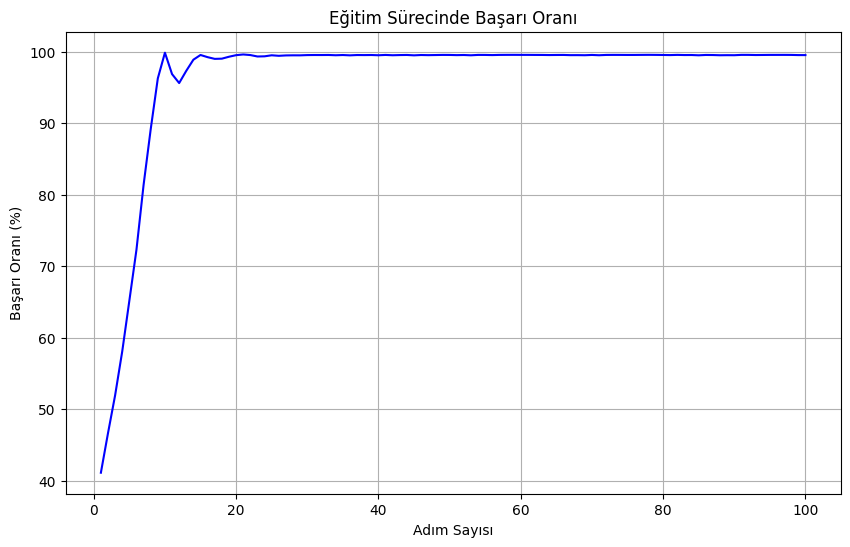

In [19]:
import matplotlib.pyplot as plt
import numpy as np
Modelin_kayip_degeri = [loss * 100 for loss in history.history['loss']]
Basari_orani = [100 - loss for loss in Modelin_kayip_degeri]
epoch_sayisi = range(1, len(Basari_orani) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epoch_sayisi, Basari_orani, linestyle='-', color='b')
plt.title("Eğitim Sürecinde Başarı Oranı")
plt.xlabel("Adım Sayısı")
plt.ylabel("Başarı Oranı (%)")
plt.grid(True)
plt.show()

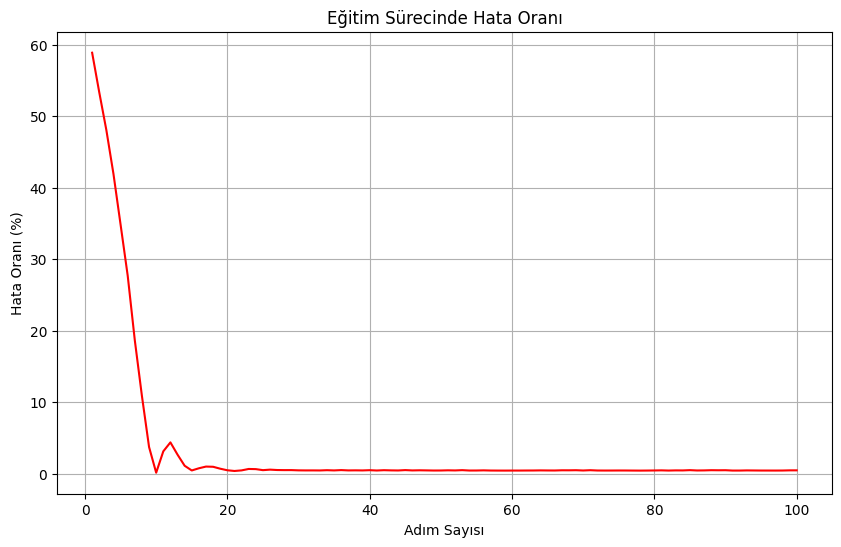

In [20]:
import matplotlib.pyplot as plt
import numpy as np
Modelin_kayip_degeri = [loss * 100 for loss in history.history['loss']]
epoch_sayisi = range(1, len(Modelin_kayip_degeri) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epoch_sayisi, Modelin_kayip_degeri, linestyle='-', color='r') # marker='o'
plt.title("Eğitim Sürecinde Hata Oranı")
plt.xlabel("Adım Sayısı")
plt.ylabel("Hata Oranı (%)")
plt.grid(True)
plt.show()

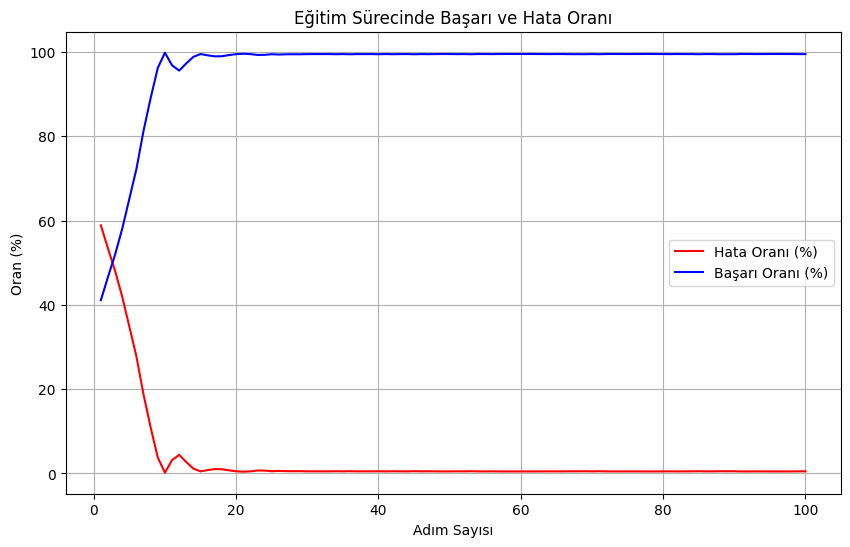

In [21]:
import matplotlib.pyplot as plt
import numpy as np
Modelin_kayip_degeri = [loss * 100 for loss in history.history['loss']]
Basari_orani = [100 - loss for loss in Modelin_kayip_degeri]
epoch_sayisi = range(1, len(Modelin_kayip_degeri) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epoch_sayisi, Modelin_kayip_degeri, linestyle='-', color='r', label='Hata Oranı (%)')
plt.plot(epoch_sayisi, Basari_orani, linestyle='-', color='b', label='Başarı Oranı (%)')
plt.title("Eğitim Sürecinde Başarı ve Hata Oranı")
plt.xlabel("Adım Sayısı")
plt.ylabel("Oran (%)")
plt.legend()
plt.grid(True)
plt.show()

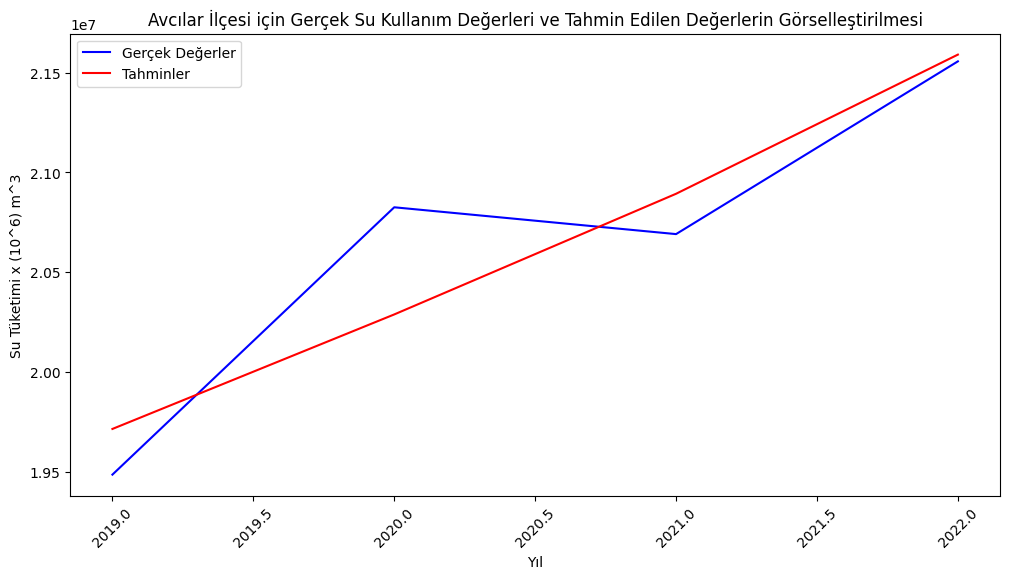

In [23]:
#Modelin tahmin performansını çizdirme
time_step = len(ilce_data) - len(trainY[0])
plt.figure(figsize=(12, 6))
plt.plot(years[time_step:time_step + len(trainY[0])], trainY[0], label='Gerçek Değerler', color='blue')
plt.plot(years[time_step:time_step + len(trainPredict)], trainPredict, label='Tahminler', color='red')
plt.title('Avcılar İlçesi için Gerçek Su Kullanım Değerleri ve Tahmin Edilen Değerlerin Görselleştirilmesi')
plt.xlabel('Yıl')
plt.ylabel('Su Tüketimi x (10^6) m^3')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [26]:
import numpy as np
farklar = np.array(trainY[0]) - np.array(trainPredict)
mutlak_farklar = np.abs(farklar)
yuzdelik_hatalar = (mutlak_farklar / np.array(trainY[0])) * 100
ortalama_yuzdelik_hata = np.mean(yuzdelik_hatalar)
#Sonuçları yazdırma
for year, gercek, tahmin, fark in zip(years[time_step:time_step + len(trainY[0])], trainY[0], trainPredict.flatten(), mutlak_farklar.flatten()):
    print("Yıl:", year ,"Gerçek: ", gercek, "Tahmin: ", tahmin, "Mutlak Fark: ", fark)
print("Ortalama Mutlak Hata: ", ortalama_yuzdelik_hata)

Yıl: 2019 Gerçek:  19485453.0 Tahmin:  19714280.0 Mutlak Fark:  228827.0
Yıl: 2020 Gerçek:  20824893.0 Tahmin:  20288002.0 Mutlak Fark:  1110613.0
Yıl: 2021 Gerçek:  20690506.0 Tahmin:  20892608.0 Mutlak Fark:  976226.0
Yıl: 2022 Gerçek:  21556002.0 Tahmin:  21589798.0 Mutlak Fark:  1841722.0
Ortalama Mutlak Hata:  4.054434485691308


In [27]:
Sistemin_toplam_hata_payi = abs(Kayip_hesabi - ortalama_yuzdelik_hata)
print("Geliştirilen Sistemin Yüzdelik oranıdaki hata payı=> %",Sistemin_toplam_hata_payi)

Geliştirilen Sistemin Yüzdelik oranıdaki hata payı=> % 0.5220863655718855
